## Install and import depedencies, connect with drive

In [5]:
from google.colab import drive

drive.mount('content/')

Mounted at content/


In [ ]:
!pip install wandb
!wandb login
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Move to right directory

In [7]:
%cd content/MyDrive

/content/content/MyDrive


In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [8]:
%cd yolov5

/content/content/MyDrive/yolov5


## Train the model!

Using Ultralytics https://github.com/ultralytics/yolov5

In [ ]:
!python train.py --img 640 --batch 32 --epochs 50 --data dataset.yaml --weights yolov5s.pt

wandb: Currently logged in as: jmisilo (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 12 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 2021-11-6 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.

## Load weights from trained model and make some predictions

In [9]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp14/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-11-12 torch 1.10.0+cu111 CPU




requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 213 layers, 7026307 parameters, 0 gradients
Adding AutoShape... 


In [10]:
import skimage.io as io

path_car = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/1200px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'
path_train = 'https://i.iplsc.com/-/000C5QF97C3FW8IT-C125-F4.jpg'
img_car = io.imread(path_car)
img_train = io.imread(path_train)

In [11]:
results = model([img_car, img_train])

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [12]:
results.print()

image 1/2: 800x1200 33 cars, 2 buss, 15 trucks
image 2/2: 365x587 1 train
Speed: 17.5ms pre-process, 304.6ms inference, 6.4ms NMS per image at shape (2, 3, 448, 640)


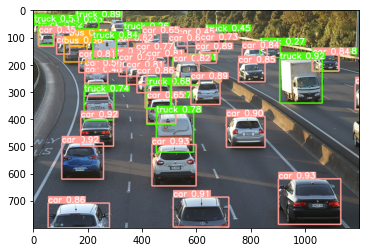

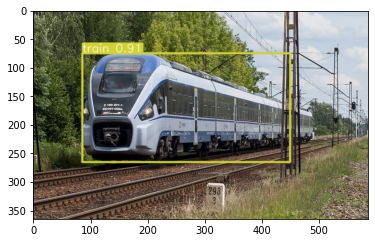

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.imshow(results.render()[0])
plt.show()
plt.imshow(results.render()[1])
plt.show()